In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ph2-dataset-images-small/PH2_Dataset_images/images/IMD002 copy 3.bmp
/kaggle/input/ph2-dataset-images-small/PH2_Dataset_images/images/IMD002 copy 5.bmp
/kaggle/input/ph2-dataset-images-small/PH2_Dataset_images/images/IMD002 copy 2.bmp
/kaggle/input/ph2-dataset-images-small/PH2_Dataset_images/images/IMD002 copy 4.bmp
/kaggle/input/ph2-dataset-images-small/PH2_Dataset_images/masks/IMD002_lesion copy 3.bmp
/kaggle/input/ph2-dataset-images-small/PH2_Dataset_images/masks/IMD002_lesion copy 4.bmp
/kaggle/input/ph2-dataset-images-small/PH2_Dataset_images/masks/IMD002_lesion copy 5.bmp
/kaggle/input/ph2-dataset-images-small/PH2_Dataset_images/masks/IMD002_lesion copy 2.bmp


In [65]:
from kaggle_secrets import UserSecretsClient
import subprocess 
import shutil


! cd '/kaggle/working'

# get token
user_secrets = UserSecretsClient()
personal_token = user_secrets.get_secret("unet-token")

repo_dir_name = '/kaggle/working/UNet'
repo_path = f'https://{personal_token}@github.com/pkliui/UNet.git'

def cloning_repo(repo_path):
    result = subprocess.run(['git', 'clone', '--progress', repo_path], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    if result.returncode == 0:
        print('Clone successful')
        print(result.stderr.decode())
    else:
        print('Clone failed')

        
if os.path.isdir(repo_dir_name):
    #os.rmdir(repo_dir_name)
    shutil.rmtree(repo_dir_name)
    print('removed existing repo ')
    print("cloning ")
    cloning_repo(repo_path)
else:    
    print("no UNet dir found, cloning")
    cloning_repo(repo_path)

no UNet dir found, cloning
Clone successful
Cloning into 'UNet'...
remote: Enumerating objects: 370, done.        
remote: Counting objects: 100% (226/226), done.        
remote: Compressing objects: 100% (131/131), done.        
remote: Total 370 (delta 90), reused 215 (delta 87), pack-reused 144        
Receiving objects: 100% (370/370), 10.93 MiB | 22.52 MiB/s, done.
Resolving deltas: 100% (124/124), done.



In [63]:
cd /kaggle/working/

/kaggle/working


In [69]:
pwd

'/kaggle/working'

In [70]:
ls

UNet/  __notebook_source__.ipynb


In [102]:
#import packages
import sys
import glob, os, fnmatch

import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

# set source path
codepath = os.path.abspath("/kaggle/working/UNet/")
if codepath not in sys.path:
    sys.path.insert(0, codepath)
    
print(sys.path)
# Create an empty __init__.py file in the UNet directory
#init_file = os.path.join('/kaggle/working/UNet/UNet/', '__init__.py')
#open(init_file, 'w').close()
#init_file = os.path.join('/kaggle/working/UNet/', '__init__.py')
#open(init_file, 'w').close()

    

#automatically track changes in the source code
%load_ext autoreload
%autoreload 2

['/kaggle/lib/kagglegym', '/kaggle/lib', '/opt/conda/lib/python37.zip', '/opt/conda/lib/python3.7', '/opt/conda/lib/python3.7/lib-dynload', '', '/root/.local/lib/python3.7/site-packages', '/opt/conda/lib/python3.7/site-packages', '/src/bq-helper', '/opt/conda/lib/python3.7/site-packages/IPython/extensions', '/root/.ipython', '/kaggle/working/UNet']
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
!cd UNet

In [75]:
!ls

UNet  __notebook_source__.ipynb


In [76]:
cd UNet

/kaggle/working/UNet


In [103]:
sys.path

['/kaggle/lib/kagglegym',
 '/kaggle/lib',
 '/opt/conda/lib/python37.zip',
 '/opt/conda/lib/python3.7',
 '/opt/conda/lib/python3.7/lib-dynload',
 '',
 '/root/.local/lib/python3.7/site-packages',
 '/opt/conda/lib/python3.7/site-packages',
 '/src/bq-helper',
 '/opt/conda/lib/python3.7/site-packages/IPython/extensions',
 '/root/.ipython',
 '/kaggle/working/UNet']

In [92]:
pwd

'/kaggle/working/UNet'

In [104]:
from UNet.data_handling.base import BaseDataLoader
from UNet.models.unet import UNet
from UNet.training.base_trainer import BaseTrainer
from UNet.data_handling.unetdataset import UNetDataset
from UNet.classes.preprocess import Resize
from UNet.metric.metric import iou_tgs_challenge

from UNet.evaluation.evaluation import evaluate_model
from UNet.metric.metric import dice_coefficient

import threading


ModuleNotFoundError: No module named 'UNet.data_handling'

In [82]:
ls

README.md  UNet/  azure-pipelines.yml


In [ ]:
# use cuda if available
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

In [ ]:
# set parameters
DATAPATH = os.path.abspath("/kaggle/input/ph2-dataset-images-small/PH2_Dataset_images/")
OUTPUT_DIR = "/kaggle/working/output"

SIZE_X = (572, 572) # size of input images
SIZE_Y = (388, 388) # size of input segmented images

LEARNING_RATE = 1e-1 # learning rate
BATCH_SIZE = 1 # batch size
VALIDATION_SPLIT = 0.25 # validation split
TEST_SPLIT = 0.25 # test split

MAX_EPOCHS = 1 # number of epochs

SCHEDULER_STEP = 50 # scheduler step
SCHEDULER_GAMMA = 0.1 # scheduler gamma
EARLY_STOP_PATIENCE = 2 # early stopping patience

In [162]:
# make output directory to keep the model

if os.path.isdir(OUTPUT_DIR):
    shutil.rmtree(OUTPUT_DIR)
    os.makedirs(OUTPUT_DIR)
else:    
    os.makedirs(OUTPUT_DIR)





In [150]:
unet_dataset = UNetDataset(
    root_dir=DATAPATH,
    images_folder="images",
    masks_folder="masks",
    extension="*.bmp",
    transform=transforms.Compose([Resize(SIZE_X, SIZE_Y)]))

In [152]:
# Create the corresponding dataloader for training and validation
data_loader = BaseDataLoader(dataset=unet_dataset,
                             batch_size=BATCH_SIZE,
                             validation_split=VALIDATION_SPLIT,
                             test_split=TEST_SPLIT
                             )

validation val_split_size =  0.25
[1 3 0 2]
train_split_size  2
val_split_size 1
test_split_size 1
the val_split_size is just right  
the test_split_size is just right  
preparing train, val, and test loaders ... 


In [153]:
# Define the model
unet_model = UNet()
save_dir = os.getcwd()+'/runs/exp1'

In [154]:
# Define the loss function and the optimizer
bce_loss = nn.BCEWithLogitsLoss()
unet_optimizer = optim.AdamW(unet_model.parameters(), lr=LEARNING_RATE)

In [156]:
# scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer=unet_optimizer, step_size=SCHEDULER_STEP, gamma=SCHEDULER_GAMMA)




In [163]:
# Initialize the trainer
basetrainer = BaseTrainer(model = unet_model,
                          loss_function = bce_loss,
                          metric = iou_tgs_challenge,
                          optimizer = unet_optimizer,
                          data_loader = data_loader,
                          n_epochs = MAX_EPOCHS,
                          lr_sched=scheduler,
                          device = device,
                          early_stop_save_dir=OUTPUT_DIR,
                          early_stop_patience=EARLY_STOP_PATIENCE,
                          save_dir=OUTPUT_DIR)

In [166]:
# call tensorboard
log_dir = OUTPUT_DIR

def start_tensorboard(logdir):
    subprocess.call(['tensorboard', '--logdir', logdir])

tb_thread = threading.Thread(target=start_tensorboard, args=(log_dir,))
tb_thread.start()


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.11.2 at http://localhost:6006/ (Press CTRL+C to quit)


In [167]:
# Start training
train_loss_values, val_loss_values, avg_score_values = basetrainer.train()



* Epoch 1/1
intersection.shape torch.Size([1, 388, 388])


In [169]:

# Evaluate the model on the test set
score, accuracy, precision, recall, F1_score, conf_matrix = evaluate_model(unet_model, data_loader.test_loader, device, dice_coefficient)





Confusion matrix: 
[[109168      0]
 [ 41376      0]]
Accuracy:  [0.72515676 0.72515676]
Precision:  [0.72515676        nan]
Recall:  [1. 0.]
F1 score:  [0.84068507        nan]
Score:  tensor([4.8337e-13])


/kaggle/working/UNet/UNet/evaluation/evaluation.py:61: RuntimeWarning: invalid value encountered in true_divide
  precision = TP / (TP + FP)


In [30]:
import pandas as pd
from IPython.display import FileLink

# map individual array elements to floats and then the map to a list
train_loss_values_2save = (list(map(float,train_loss_values)))
val_loss_values_2save = (list(map(float,val_loss_values)))
#avg_score_values_2save = (list(map(float,avg_score_values)))

# save loss and score as csv
pd.DataFrame(train_loss_values_2save).to_csv('train_loss_values.csv', index = False)
FileLink(r'train_loss_values.csv')
pd.DataFrame(val_loss_values_2save).to_csv('val_loss_values.csv', index = False)
FileLink(r'val_loss_values.csv')
#pd.DataFrame(avg_score_values_2save).to_csv('avg_score_values.csv', index = False)
#FileLink(r'avg_score_values.csv')




# save model
torch.save(unet_model.state_dict(), 'my-unet-model.pt')
FileLink(r'my-unet-model.pt')

/kaggle/working/my-unet-model.pt

In [31]:
states = {
        'number of epochs': MAX_EPOCHS,
        'state_dict': unet_model.state_dict(),
        'optimizer': unet_optimizer.state_dict()
         }
torch.save(states, 'my-unet-model-states.pt')
FileLink(r'my-unet-model-states.pt')

/kaggle/working/my-unet-model-states.pt

<function matplotlib.pyplot.show(close=None, block=None)>

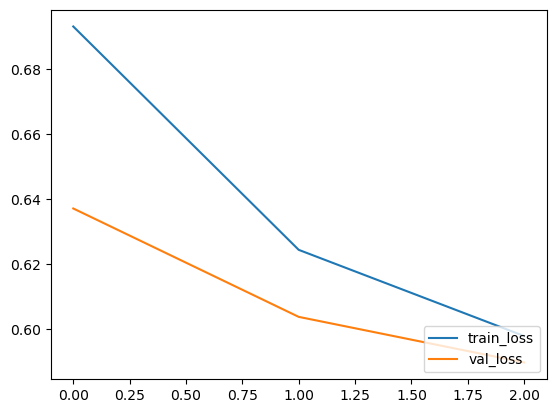

In [33]:
import pandas as pd
from matplotlib import pyplot as plt
train_loss_values = pd.read_csv("/kaggle/working/train_loss_values.csv")
val_loss_values = pd.read_csv("/kaggle/working/val_loss_values.csv")
#avg_score_values = pd.read_csv("../input/16-hw-semantic-segmentation-unet/avg_score_values.csv")

first_epoch = 0
plt.plot(train_loss_values[first_epoch:])
plt.plot(val_loss_values[first_epoch:])
#plt.plot(avg_score_values[first_epoch:])
#plt.legend(["train_loss", "val_loss", "avg_score"], loc ="lower right")
plt.legend(["train_loss", "val_loss"], loc ="lower right")


plt.show